In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)
from openpyxl import load_workbook
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.
C:\Users\3c\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\3c\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\3c\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\3c\AppData\Roaming\Python\

In [2]:
#讀取資料
wd = load_workbook("C:/Users/3c/Desktop/test123.xlsx")
all_df = pd.read_excel("C:/Users/3c/Desktop/test123.xlsx")
#wd = load_workbook("C:/Users/3c/Desktop/BEESoundMFCC/DataBase/BEESoundMFCC.xlsx")
#all_df = pd.read_excel("C:/Users/3c/Desktop/BEESoundMFCC/DataBase/BEESoundMFCC.xlsx")
#all_df = pd.read_excel("C:/Users/3c/Desktop/BEESoundMFCC/DataBase/BEESoundMFCC.xlsx")#資料集

In [3]:
#選取需要的欄位
ws = wd.active
cols = []
cols.append("situation")
for i in range(4,135):
#for i in range(2,123):
    d = ws.cell(row = 1,column = i)
    cols.append(d.value)
all_df['situation']= all_df['situation'].map({'Active':0, 'MissingQueen':1}).astype(int)
all_df=all_df[cols]
all_df


,situation,0,5,10,16,21,26,32,37,43,...,651,656,662,667,672,678,683,689,694,699
0,0,0.002646,0.002907,0.004406,0.006780,0.009356,0.022236,0.040542,0.052808,0.061167,...,0.009609,0.010124,0.011213,0.011446,0.013078,0.015698,0.015959,0.016050,0.016606,0.017191
1,0,0.001472,0.001662,0.002896,0.004911,0.009555,0.016962,0.027468,0.048823,0.048638,...,0.013305,0.015009,0.015548,0.015138,0.016861,0.018307,0.020014,0.019813,0.022878,0.023671
2,0,0.004596,0.005824,0.009474,0.017472,0.036140,0.056778,0.086479,0.173445,0.128771,...,0.058500,0.065658,0.065303,0.077764,0.073391,0.087552,0.082318,0.099304,0.105709,0.104895
3,0,0.007089,0.008062,0.013179,0.019902,0.042330,0.065887,0.115904,0.192761,0.128676,...,0.093800,0.096851,0.104217,0.131570,0.139930,0.152351,0.145682,0.151212,0.168438,0.172146
4,0,0.007473,0.009021,0.016146,0.028829,0.055193,0.091079,0.115295,0.246890,0.281950,...,0.105640,0.110819,0.120574,0.134106,0.137403,0.160447,0.162396,0.188583,0.208554,0.208032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,0.009403,0.019745,0.023582,0.038841,0.067115,0.119550,0.138964,0.240655,0.265906,...,0.009027,0.008734,0.008164,0.007677,0.008097,0.006534,0.006139,0.005718,0.004447,0.004289
584,0,0.010804,0.024155,0.028657,0.037302,0.061495,0.123712,0.091758,0.103613,0.134965,...,0.013447,0.011850,0.012292,0.011627,0.010266,0.010470,0.008472,0.007903,0.005652,0.006316
585,0,0.011809,0.022359,0.026259,0.037412,0.060424,0.089218,0.091735,0.309457,0.521590,...,0.029225,0.028764,0.027077,0.024980,0.025126,0.018995,0.012957,0.011091,0.011824,0.007148
586,0,0.016155,0.038634,0.043238,0.063700,0.088818,0.146884,0.126593,0.187276,0.257480,...,0.048322,0.037135,0.034190,0.029201,0.024115,0.021950,0.017051,0.014125,0.012182,0.009523


In [4]:
#將資料80%為訓練資料、20 % 為測試資料
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 588 train: 474 test: 114


In [5]:
#將狀態標籤對應成數值(0、1)
def PreprocessData(all_df):
    #for i in range(4,135):
    for i in range(3,123):
        d = ws.cell(row = 1,column = i)
        amp_mean = all_df[d.value].mean()
        all_df[d.value] = all_df[d.value].fillna(amp_mean)
        #print(all_df[d.value])
    #all_df['situation']= all_df['situation'].map({'Active':0, 'MissingQueen':1}).astype(int)
    #df=raw_df.drop(['sample_name'], axis=1)
    #all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)
    #all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)
    #轉array
    ndarray = all_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
        
    return scaledFeatures,Label

In [6]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

C:\Users\3c\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\3c\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
test_Label

array([0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [37]:
#建立線性堆疊模型
model = Sequential()

In [38]:
#建立神經網絡層,units(隱藏層1神經元有40個),input_dim(預處理特徵有131個資料)
model.add(Dense(units=40, input_dim=131, 
                kernel_initializer='uniform', 
                activation='relu'))

In [39]:
# units(隱藏層2神經元有30個)
"""
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu')) #沒有負數
#overfitting 問題 : Dropout =>隨機放棄(X%)的神經元來減低過擬合問題
"""
model.add(Dropout(0.5))

In [40]:
#units(輸出層1有一個神經元)
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid')) #計算機率分成以下幾個

In [41]:
#loss損失函數，optimizer優化方法，metrics評估模型的方式
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [42]:
#fit為訓練函式，epochs執行30次訓練，validation_split為10%機率驗證，verbose(顯示方式為種類二的的每輪一行)
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=100, 
                         batch_size=30,verbose=2)

Train on 426 samples, validate on 48 samples
Epoch 1/100
 - 0s - loss: 0.6856 - acc: 0.6221 - val_loss: 0.7000 - val_acc: 0.3750
Epoch 2/100
 - 0s - loss: 0.6660 - acc: 0.6690 - val_loss: 0.7139 - val_acc: 0.3542
Epoch 3/100
 - 0s - loss: 0.6364 - acc: 0.7066 - val_loss: 0.7181 - val_acc: 0.3750
Epoch 4/100
 - 0s - loss: 0.6011 - acc: 0.7371 - val_loss: 0.7052 - val_acc: 0.4792
Epoch 5/100
 - 0s - loss: 0.5733 - acc: 0.7700 - val_loss: 0.6933 - val_acc: 0.5208
Epoch 6/100
 - 0s - loss: 0.5455 - acc: 0.7723 - val_loss: 0.7024 - val_acc: 0.5208
Epoch 7/100
 - 0s - loss: 0.5247 - acc: 0.7958 - val_loss: 0.7015 - val_acc: 0.5208
Epoch 8/100
 - 0s - loss: 0.4960 - acc: 0.8028 - val_loss: 0.6960 - val_acc: 0.5625
Epoch 9/100
 - 0s - loss: 0.4767 - acc: 0.8146 - val_loss: 0.7016 - val_acc: 0.5625
Epoch 10/100
 - 0s - loss: 0.4583 - acc: 0.8216 - val_loss: 0.6999 - val_acc: 0.5625
Epoch 11/100
 - 0s - loss: 0.4401 - acc: 0.8357 - val_loss: 0.7005 - val_acc: 0.5625
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.0826 - acc: 0.9718 - val_loss: 0.1636 - val_acc: 0.9583
Epoch 98/100
 - 0s - loss: 0.0845 - acc: 0.9812 - val_loss: 0.1647 - val_acc: 0.9583
Epoch 99/100
 - 0s - loss: 0.0909 - acc: 0.9812 - val_loss: 0.1640 - val_acc: 0.9583
Epoch 100/100
 - 0s - loss: 0.0870 - acc: 0.9765 - val_loss: 0.1579 - val_acc: 0.9583


In [43]:
#畫出準確率執行結果
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

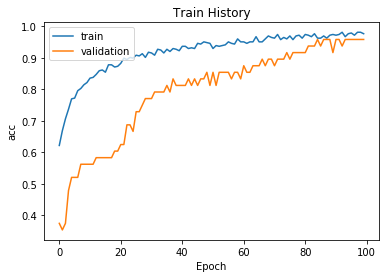

In [44]:
show_train_history(train_history,'acc','val_acc')

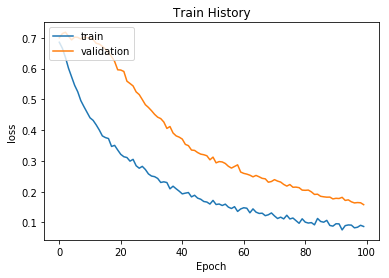

In [45]:
#失誤率
show_train_history(train_history,'loss','val_loss')

In [34]:
#評估模型準確率
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

114/114 [==============================] - 0s 0us/step


In [35]:
#準確率
scores[1]

0.9473684210526315

In [36]:
"""
test_df = pd.read_excel("C:/Users/3c/Desktop/testdata.xlsx")
wd = load_workbook("C:/Users/3c/Desktop/BEESoundMFCC/DataBase/BEESoundMFCC.xlsx")
"""

'\ntest_df = pd.read_excel("C:/Users/3c/Desktop/testdata.xlsx")\nwd = load_workbook("C:/Users/3c/Desktop/BEESoundMFCC/DataBase/BEESoundMFCC.xlsx")\n'

In [20]:
"""
ws = wd.active
test_df = test_df[cols]
lis = []
row ,column = 1,1
if ws.cell(row,column).value == 'sample_name':
    row += 1
for i in range(2,123):   
    d = ws.cell(row ,column = i)
    print(d.value)
    if d.value == 'active':
        lis.append(0)
    elif d.value == 'missing queen':
        lis.append(1)
    else:
        lis.append(d.value)
#print(lis)

newdata_DF = pd.DataFrame([lis],columns=cols)
all_df = pd.concat([all_df,newdata_DF])
#all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)
all_df[-10:]
"""

"\nws = wd.active\ntest_df = test_df[cols]\nlis = []\nrow ,column = 1,1\nif ws.cell(row,column).value == 'sample_name':\n    row += 1\nfor i in range(2,123):   \n    d = ws.cell(row ,column = i)\n    print(d.value)\n    if d.value == 'active':\n        lis.append(0)\n    elif d.value == 'missing queen':\n        lis.append(1)\n    else:\n        lis.append(d.value)\n#print(lis)\n\nnewdata_DF = pd.DataFrame([lis],columns=cols)\nall_df = pd.concat([all_df,newdata_DF])\n#all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)\nall_df[-10:]\n"

In [21]:
"""
def PreprocessData(all_df):
    #for i in range(4,135):
    for i in range(3,123):
        d = ws.cell(row = 1,column = i)
        amp_mean = all_df[d.value].mean()
        all_df[d.value] = all_df[d.value].fillna(amp_mean)
        #print(all_df[d.value])
    #all_df['situation']= all_df['situation'].map({'Active':0, 'MissingQueen':1}).astype(int)
    #df=raw_df.drop(['sample_name'], axis=1)
    #all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)
    #all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)
    #轉array
    ndarray = all_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
        
    return scaledFeatures,Label
all_Features,Label=PreprocessData(all_df)
"""

"\ndef PreprocessData(all_df):\n    #for i in range(4,135):\n    for i in range(3,123):\n        d = ws.cell(row = 1,column = i)\n        amp_mean = all_df[d.value].mean()\n        all_df[d.value] = all_df[d.value].fillna(amp_mean)\n        #print(all_df[d.value])\n    #all_df['situation']= all_df['situation'].map({'Active':0, 'MissingQueen':1}).astype(int)\n    #df=raw_df.drop(['sample_name'], axis=1)\n    #all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)\n    #all_df['label']= all_df['label'].map({'active':0, 'missing queen': 1}).astype(int)\n    #轉array\n    ndarray = all_df.values\n    Features = ndarray[:,1:]\n    Label = ndarray[:,0]\n\n    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))\n    scaledFeatures=minmax_scale.fit_transform(Features)    \n        \n    return scaledFeatures,Label\nall_Features,Label=PreprocessData(all_df)\n"

In [22]:
all_Features,Label=PreprocessData(all_df)
all_probability=model.predict(all_Features)

In [23]:
all_probability[:1]

array([[0.1645068]], dtype=float32)

In [24]:
pd=all_df
#pd.insert(len(all_df.columns),'probability',all_probability)
pd[-10:]

,situation,0,5,10,16,21,26,32,37,43,...,651,656,662,667,672,678,683,689,694,699
578,0,0.012725,0.026978,0.032067,0.049815,0.071357,0.143486,0.101444,0.199616,0.341727,...,0.020061,0.019429,0.019861,0.021051,0.016669,0.016034,0.014138,0.010561,0.012157,0.009383
579,0,0.004321,0.007881,0.008917,0.012583,0.018753,0.038505,0.030140,0.101321,0.100854,...,0.003601,0.004023,0.004276,0.003209,0.002976,0.002712,0.002205,0.002093,0.002034,0.001814
580,0,0.011400,0.021795,0.029414,0.037286,0.054034,0.099644,0.079923,0.183002,0.206614,...,0.013782,0.013003,0.012972,0.011290,0.010990,0.008872,0.008344,0.007341,0.006856,0.005763
581,0,0.024724,0.058714,0.065949,0.083686,0.136119,0.237452,0.151723,0.164290,0.185155,...,0.040599,0.044958,0.032730,0.029789,0.025043,0.023197,0.020644,0.018078,0.016301,0.015489
582,0,0.026305,0.070049,0.083615,0.110318,0.170688,0.299607,0.253748,0.376937,0.430423,...,0.031486,0.034031,0.034886,0.026761,0.025492,0.022060,0.019668,0.016588,0.015013,0.015076
583,0,0.009403,0.019745,0.023582,0.038841,0.067115,0.119550,0.138964,0.240655,0.265906,...,0.009027,0.008734,0.008164,0.007677,0.008097,0.006534,0.006139,0.005718,0.004447,0.004289
584,0,0.010804,0.024155,0.028657,0.037302,0.061495,0.123712,0.091758,0.103613,0.134965,...,0.013447,0.011850,0.012292,0.011627,0.010266,0.010470,0.008472,0.007903,0.005652,0.006316
585,0,0.011809,0.022359,0.026259,0.037412,0.060424,0.089218,0.091735,0.309457,0.521590,...,0.029225,0.028764,0.027077,0.024980,0.025126,0.018995,0.012957,0.011091,0.011824,0.007148
586,0,0.016155,0.038634,0.043238,0.063700,0.088818,0.146884,0.126593,0.187276,0.257480,...,0.048322,0.037135,0.034190,0.029201,0.024115,0.021950,0.017051,0.014125,0.012182,0.009523
587,0,0.008626,0.017591,0.023297,0.041736,0.054149,0.092235,0.102594,0.136633,0.115912,...,0.013190,0.015265,0.012786,0.012122,0.011849,0.009465,0.008969,0.006543,0.005297,0.004353


In [25]:
"""
prediction = model.predict_classes(test_Features) 
prediction
pd.crosstab(test_Features,prediction,rownames=['label'],colnames=['predict'])
"""

"\nprediction = model.predict_classes(test_Features) \nprediction\npd.crosstab(test_Features,prediction,rownames=['label'],colnames=['predict'])\n"

In [26]:
#模型儲存

model.save_weights("savemodel.h5")
print("Saved model to disk")


Saved model to disk


In [27]:
#模型載入
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)
from openpyxl import load_workbook
from keras.models import Sequential
from keras.layers import Dense,Dropout
try:
    model.load_weights("savemodel.h5")
    print("success")
except:
    print("fail")


success


In [28]:
# 預測資料

#pd_df = pd.read_excel("MQ.xlsx")
#print(pd_df[:1])


In [29]:
#進行預測
#all_Features,Label=PreprocessData(all_df)
#prediction = model.predict_classes(train_Features)
#all_Features,Label=PreprocessData(all_df)

In [30]:
#prediction

In [31]:
#prediction_classes=prediction.reshape(-1)
#prediction_classes[:10]

In [32]:
#all_probability=model.predict(all_Features)

In [33]:
# all_probability[:10]

In [34]:
#pd=all_df
#pd.insert(len(all_df.columns),
          #'probability',all_probability)

In [35]:
#預測資料的
#pd[:5]

In [36]:
#該是有女王蜂的但是機率顯示失去女王蜂
# pd[(pd['situation']==0) &  (pd['probability']>0.8) ]

In [37]:
# import pandas as pd
# pd.crosstab(Label,all_Features,
#             rownames=['label'],colnames=['predict'])

In [38]:
"""
import pandas as pd
print(train_Label)
print(prediction_classes)
pd.crosstab(train_Label,prediction_classes,
            rownames=['label'],colnames=['predict'])
"""

"\nimport pandas as pd\nprint(train_Label)\nprint(prediction_classes)\npd.crosstab(train_Label,prediction_classes,\n            rownames=['label'],colnames=['predict'])\n"

In [39]:
test_df = pd.read_excel("C:/Users/3c/Desktop/testdata.xlsx")
wd = load_workbook("C:/Users/3c/Desktop/testdata.xlsx")

In [42]:

ws = wd.active
test_df = test_df[cols]
lis = []
row ,column = 1,1
if ws.cell(row,column).value == 'Name':
    row += 1
    for i in range(3,135):
        d = ws.cell(row ,column = i)
        if d.value == 'Active':
            print(i)
            lis.append(0)
        elif d.value == 'MissingQueen':
            print(i)
            lis.append(1)
        else:
            #d = ws.cell(row ,column = i)
            lis.append(d.value)
newdata_DF = pd.DataFrame([lis],columns=cols)

all_df = pd.concat([all_df,newdata_DF])
all_df[-1:]


3


,situation,0,5,10,16,21,26,32,37,43,...,651,656,662,667,672,678,683,689,694,699
0,0,0.016675,0.015855,0.021025,0.039289,0.121918,0.305409,0.206302,0.268948,0.401486,...,0.021193,0.01846,0.019048,0.018257,0.015417,0.014904,0.016307,0.01381,0.013838,0.01355


In [43]:
#testdata_Features,testdata_Label=PreprocessData(all_df)
#all_df['situation']= all_df['situation'].map({'Active':0, 'MissingQueen':1}).astype(int)

In [44]:
all_Features,Label=PreprocessData(all_df)
len(all_Features)

589

In [50]:
all_probability=model.predict(all_Features)

In [54]:
all_probability[:589]

array([[1.6450679e-01],
       [5.8108211e-02],
       [1.4688299e-04],
       [6.0347729e-06],
       [6.4111459e-06],
       [9.8966062e-02],
       [1.6419092e-01],
       [4.9316213e-02],
       [1.1195258e-02],
       [2.6534095e-02],
       [1.2089026e-03],
       [2.7376651e-05],
       [4.7503647e-05],
       [5.2848307e-05],
       [1.6948635e-06],
       [3.1278385e-03],
       [5.5234432e-02],
       [7.2047519e-03],
       [1.1134438e-02],
       [5.4671038e-03],
       [8.8098586e-01],
       [9.5278794e-01],
       [9.8212123e-01],
       [9.7734660e-01],
       [9.4269437e-01],
       [9.8351675e-01],
       [9.8352319e-01],
       [9.4573396e-01],
       [8.6383432e-01],
       [9.3511665e-01],
       [9.5372474e-01],
       [6.1269158e-01],
       [6.4527184e-01],
       [9.7035384e-01],
       [9.0912706e-01],
       [9.8302495e-01],
       [9.7462952e-01],
       [9.6373361e-01],
       [9.4936228e-01],
       [9.6702665e-01],
       [9.7890431e-01],
       [9.810143

In [47]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

In [48]:
pd[-1:]

,situation,0,5,10,16,21,26,32,37,43,...,656,662,667,672,678,683,689,694,699,probability
0,0,0.016675,0.015855,0.021025,0.039289,0.121918,0.305409,0.206302,0.268948,0.401486,...,0.01846,0.019048,0.018257,0.015417,0.014904,0.016307,0.01381,0.013838,0.01355,0.008504


In [49]:
pd[(pd['situation'] == 0) & (pd['probability'] < 0.3)]

,situation,0,5,10,16,21,26,32,37,43,...,656,662,667,672,678,683,689,694,699,probability
0,0,0.002646,0.002907,0.004406,0.006780,0.009356,0.022236,0.040542,0.052808,0.061167,...,0.010124,0.011213,0.011446,0.013078,0.015698,0.015959,0.016050,0.016606,0.017191,0.164507
1,0,0.001472,0.001662,0.002896,0.004911,0.009555,0.016962,0.027468,0.048823,0.048638,...,0.015009,0.015548,0.015138,0.016861,0.018307,0.020014,0.019813,0.022878,0.023671,0.058108
2,0,0.004596,0.005824,0.009474,0.017472,0.036140,0.056778,0.086479,0.173445,0.128771,...,0.065658,0.065303,0.077764,0.073391,0.087552,0.082318,0.099304,0.105709,0.104895,0.000147
3,0,0.007089,0.008062,0.013179,0.019902,0.042330,0.065887,0.115904,0.192761,0.128676,...,0.096851,0.104217,0.131570,0.139930,0.152351,0.145682,0.151212,0.168438,0.172146,0.000006
4,0,0.007473,0.009021,0.016146,0.028829,0.055193,0.091079,0.115295,0.246890,0.281950,...,0.110819,0.120574,0.134106,0.137403,0.160447,0.162396,0.188583,0.208554,0.208032,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0,0.014983,0.031506,0.033926,0.047223,0.080513,0.119249,0.120691,0.391802,0.286434,...,0.022727,0.022663,0.020524,0.019643,0.016339,0.016634,0.012231,0.009981,0.009020,0.298636
581,0,0.024724,0.058714,0.065949,0.083686,0.136119,0.237452,0.151723,0.164290,0.185155,...,0.044958,0.032730,0.029789,0.025043,0.023197,0.020644,0.018078,0.016301,0.015489,0.290198
585,0,0.011809,0.022359,0.026259,0.037412,0.060424,0.089218,0.091735,0.309457,0.521590,...,0.028764,0.027077,0.024980,0.025126,0.018995,0.012957,0.011091,0.011824,0.007148,0.296842
587,0,0.008626,0.017591,0.023297,0.041736,0.054149,0.092235,0.102594,0.136633,0.115912,...,0.015265,0.012786,0.012122,0.011849,0.009465,0.008969,0.006543,0.005297,0.004353,0.296266
